In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [302]:
import json

# Opening JSON file
document=[]
with open('pairs.jsonl', 'r') as json_file:
    json_list = list(json_file)

In [5]:
dom=[]
for json_str in json_list:
    dom.append(json.loads(json_str)['fandoms'][0])
    dom.append(json.loads(json_str)['fandoms'][1])

In [354]:
ndom=np.unique(dom)

len(ndom)

1600

In [8]:
for json_str in json_list:
    document.append(json.loads(json_str)['pair'][0])
    document.append(json.loads(json_str)['pair'][1])

In [9]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(document)

# Finding Optimum Cluster number

Text(0.5, 1.0, 'Elbow Method For Optimal k')

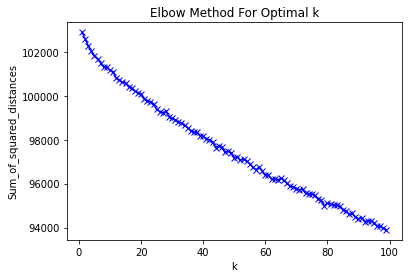

In [19]:
Sum_of_squared_distances = []
K = range(1,100)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

In [20]:
from kneed import KneeLocator

In [21]:
kl = KneeLocator(range(1, 100), Sum_of_squared_distances, curve="convex", direction="decreasing")

In [22]:
kl.elbow

26

In [23]:
df = pd.DataFrame(data={"col1": Sum_of_squared_distances})
df.to_csv("PAN_pairs_optimum_Clustering_file.csv", sep=',',index=False)

# Clustering using optimum cluster numbers

In [10]:
true_k = 26
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=26, n_init=1)

In [11]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

In [12]:
for i in range(true_k):
 print("Cluster %d:"% i),
 for ind in order_centroids[i, :50]:
     print(' %s' % terms[ind])

Cluster 0:
 elena
 klaus
 damon
 jamie
 rex
 stefan
 caroline
 elijah
 tyler
 said
 bonnie
 val
 rebekah
 hayley
 just
 jeremy
 landon
 like
 know
 caitie
 don
 katherine
 kol
 eyes
 catie
 didn
 looked
 asked
 matt
 going
 time
 vampire
 did
 zick
 hand
 want
 head
 ll
 room
 brother
 hank
 way
 sofia
 marcel
 face
 holiday
 right
 away
 nate
 little
Cluster 1:
 nick
 logan
 veronica
 said
 just
 ellis
 monroe
 like
 heath
 rogue
 know
 greg
 miley
 don
 looked
 scott
 gatsby
 carly
 eyes
 asked
 didn
 hank
 time
 sara
 jarrod
 going
 wade
 marie
 grissom
 head
 jean
 did
 ll
 room
 got
 remy
 rochelle
 hand
 man
 joe
 door
 face
 way
 look
 want
 catherine
 think
 right
 duncan
 lilly
Cluster 2:
 lucy
 edmund
 wyatt
 natsu
 susan
 said
 caspian
 just
 peter
 like
 know
 narnia
 rufus
 erza
 amy
 eyes
 aslan
 looked
 time
 asked
 don
 didn
 kouta
 nicholas
 going
 levy
 gru
 kevin
 jack
 did
 solange
 flynn
 head
 ll
 linus
 face
 room
 sue
 want
 hand
 jiya
 think
 right
 charlie
 wa

# Removing cluster centroids

In [149]:
cluster0=[]
cluster1=[]
for json_str in range(len(json_list)):
#     dom.append(json.loads(json_str)['fandoms'][0])
#     dom.append(json.loads(json_str)['fandoms'][1])
    x0 = vectorizer.transform([json.loads(json_list[json_str])['pair'][0]])
    x1 = vectorizer.transform([json.loads(json_list[json_str])['pair'][1]])

    cluster0.append(model.predict(x0))
    cluster1.append(model.predict(x1))

# print("Text0 belongs to cluster number {} and Text1 belongs to cluster number {}".format(cluster0,cluster1))

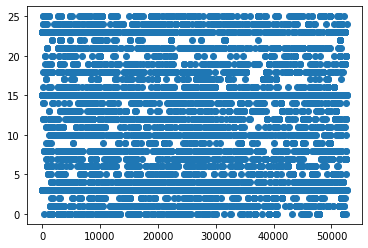

In [155]:
import matplotlib.pyplot as plt
plt.scatter(range(len(json_list)),cluster1)

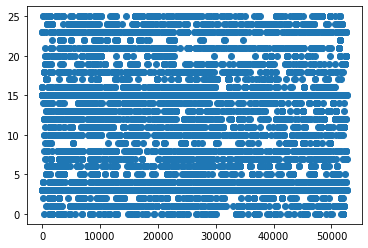

In [156]:
import matplotlib.pyplot as plt
plt.scatter(range(len(json_list)),cluster0)

In [157]:
result0=[]
result1=[]
for json_str in range(len(json_list)):
    query0 = json.loads(json_list[json_str])['pair'][0]#
    stopwords0 = terms[order_centroids[cluster0[json_str], :50]]#             
    querywords0 = query0.split()

    query1 = json.loads(json_list[json_str])['pair'][1]#
    stopwords1 = terms[order_centroids[cluster1[json_str], :50]]#             
    querywords1 = query1.split()

    resultwords0  = [word for word in querywords0 if word.lower() not in stopwords0]
    result0.append(' '.join(resultwords0))
    resultwords1  = [word for word in querywords1 if word.lower() not in stopwords1]
    result1.append(' '.join(resultwords1))

# Writing to new Jsonl file

In [ ]:
df = pd.read_json("pairs.jsonl", lines=True)#convert to dataframe
df.info()

In [341]:
for json_str in range(len(json_list)): # replace pairs with new removed centriods ones
    df.iloc[json_str]['pair'][0]=result0[json_str]
    df.iloc[json_str]['pair'][1]=result1[json_str]

In [350]:
df.head()

,id,fandoms,pair
0,6cced668-6e51-5212-873c-717f2bc91ce6,"[Guardians of Ga'Hoole, Hetalia - Axis Powers]","[I shift a bit, warily letting my dart from on..."
1,3c6c188a-db28-59aa-8c09-3d0f799ff579,"[Guardians of Ga'Hoole, Warriors]","[I shift a bit, warily letting my dart from on..."
2,b0cfa94f-c9ec-5aa5-8331-a5a249b664cf,"[Guardians of Ga'Hoole, Xiaolin Showdown]",[A single tear escaped me as I left. I have a ...
3,e6e86e73-9a7b-58f2-a652-a17b4a1bcabf,"[Hetalia - Axis Powers, Warriors]","[""Ja."" Ludwig kept his gaze upon her, solidly...."
4,4fe541af-912e-5a86-81a5-94c6d3891509,"[Hetalia - Axis Powers, Xiaolin Showdown]","[And he did. Slowly, hesitantly...but coming f..."


In [346]:
f=open('new_pairs.jsonl','w')
print(df.to_json(orient='records', lines=True),file=f, flush=False)